# Post-analysis of posterior distribution: Weighted Ridge Regression for adjusting posterior estimates of  $\theta$  from the SMC-ABC with importance sampling.

In [7]:
#Loading packages
library(see)
library(transport) #For Wassertein distance computation
library(parallel) # For parallizing R codes
RNGkind("L'Ecuyer-CMRG") #Dealing with distinct seed value in R
#library(markovchain)
#library(diagram)
library('latex2exp') #For adding LaTeX symbols to R plots
library(MASS)
library("kader")
library("PerformanceAnalytics")
library(glmnet)
library("kedd")
library(bayestestR)#for credible interval and HDI+ROPE decision


In [10]:
setwd("/Users/twunasi-admin/Desktop/Clement_Folder/Modified ABC-SMC fitting_results_current/Modified ABC fitting_500")

# Plotting posterior distribution and priors

In [11]:
#Importing posterior densities from Weighted-iterative ABC with Sequential Monte Carlo with importance sampling
draws<- c(500)
density_post<-NULL

for(n in draws){ 
    
ABC_iterations<-11
number_of_parameters<- 23
x <- seq(from = -10, to = 7, length.out = 256)#range of prior distribution
density_post[[n]]<- list()
for(j in 1:ABC_iterations) {
    density_post[[n]][[j]]<-read.csv(file=paste0("density_post_",j,"_",n,".csv"))
    density_post[[n]][[j]]<-density_post[[n]][[j]][,-1]
          }
}

In [12]:
parameter_labels=c(expression(paste("b"[11])),expression(paste("b"[12])),
                   expression(paste("b"[21])),expression(paste("b"[22])), 
                   expression(paste("b"[31])),expression(paste("b"[32])),
                   expression(paste("d"[11])),expression(paste("d"[12])),
                   expression(paste("d"[21])),expression(paste("d"[22])), 
                   expression(paste("d"[31])),expression(paste("d"[32])),
                   expression(paste("m")),  expression(paste("r")),
                   expression(paste("r"[1])),expression(paste("r"[2])),
                   expression(paste("r"[3])),expression(paste("s")),
                   expression(paste("s"[1])),expression(paste(epsilon[1])),
                   expression(paste(epsilon[2])),expression(paste(epsilon[3])),
                   expression(paste(kappa)))
options(repr.plot.width=8, repr.plot.height=8,repr.plot.res = 300) #Setting plot size

# Density plot on log scale at N=500

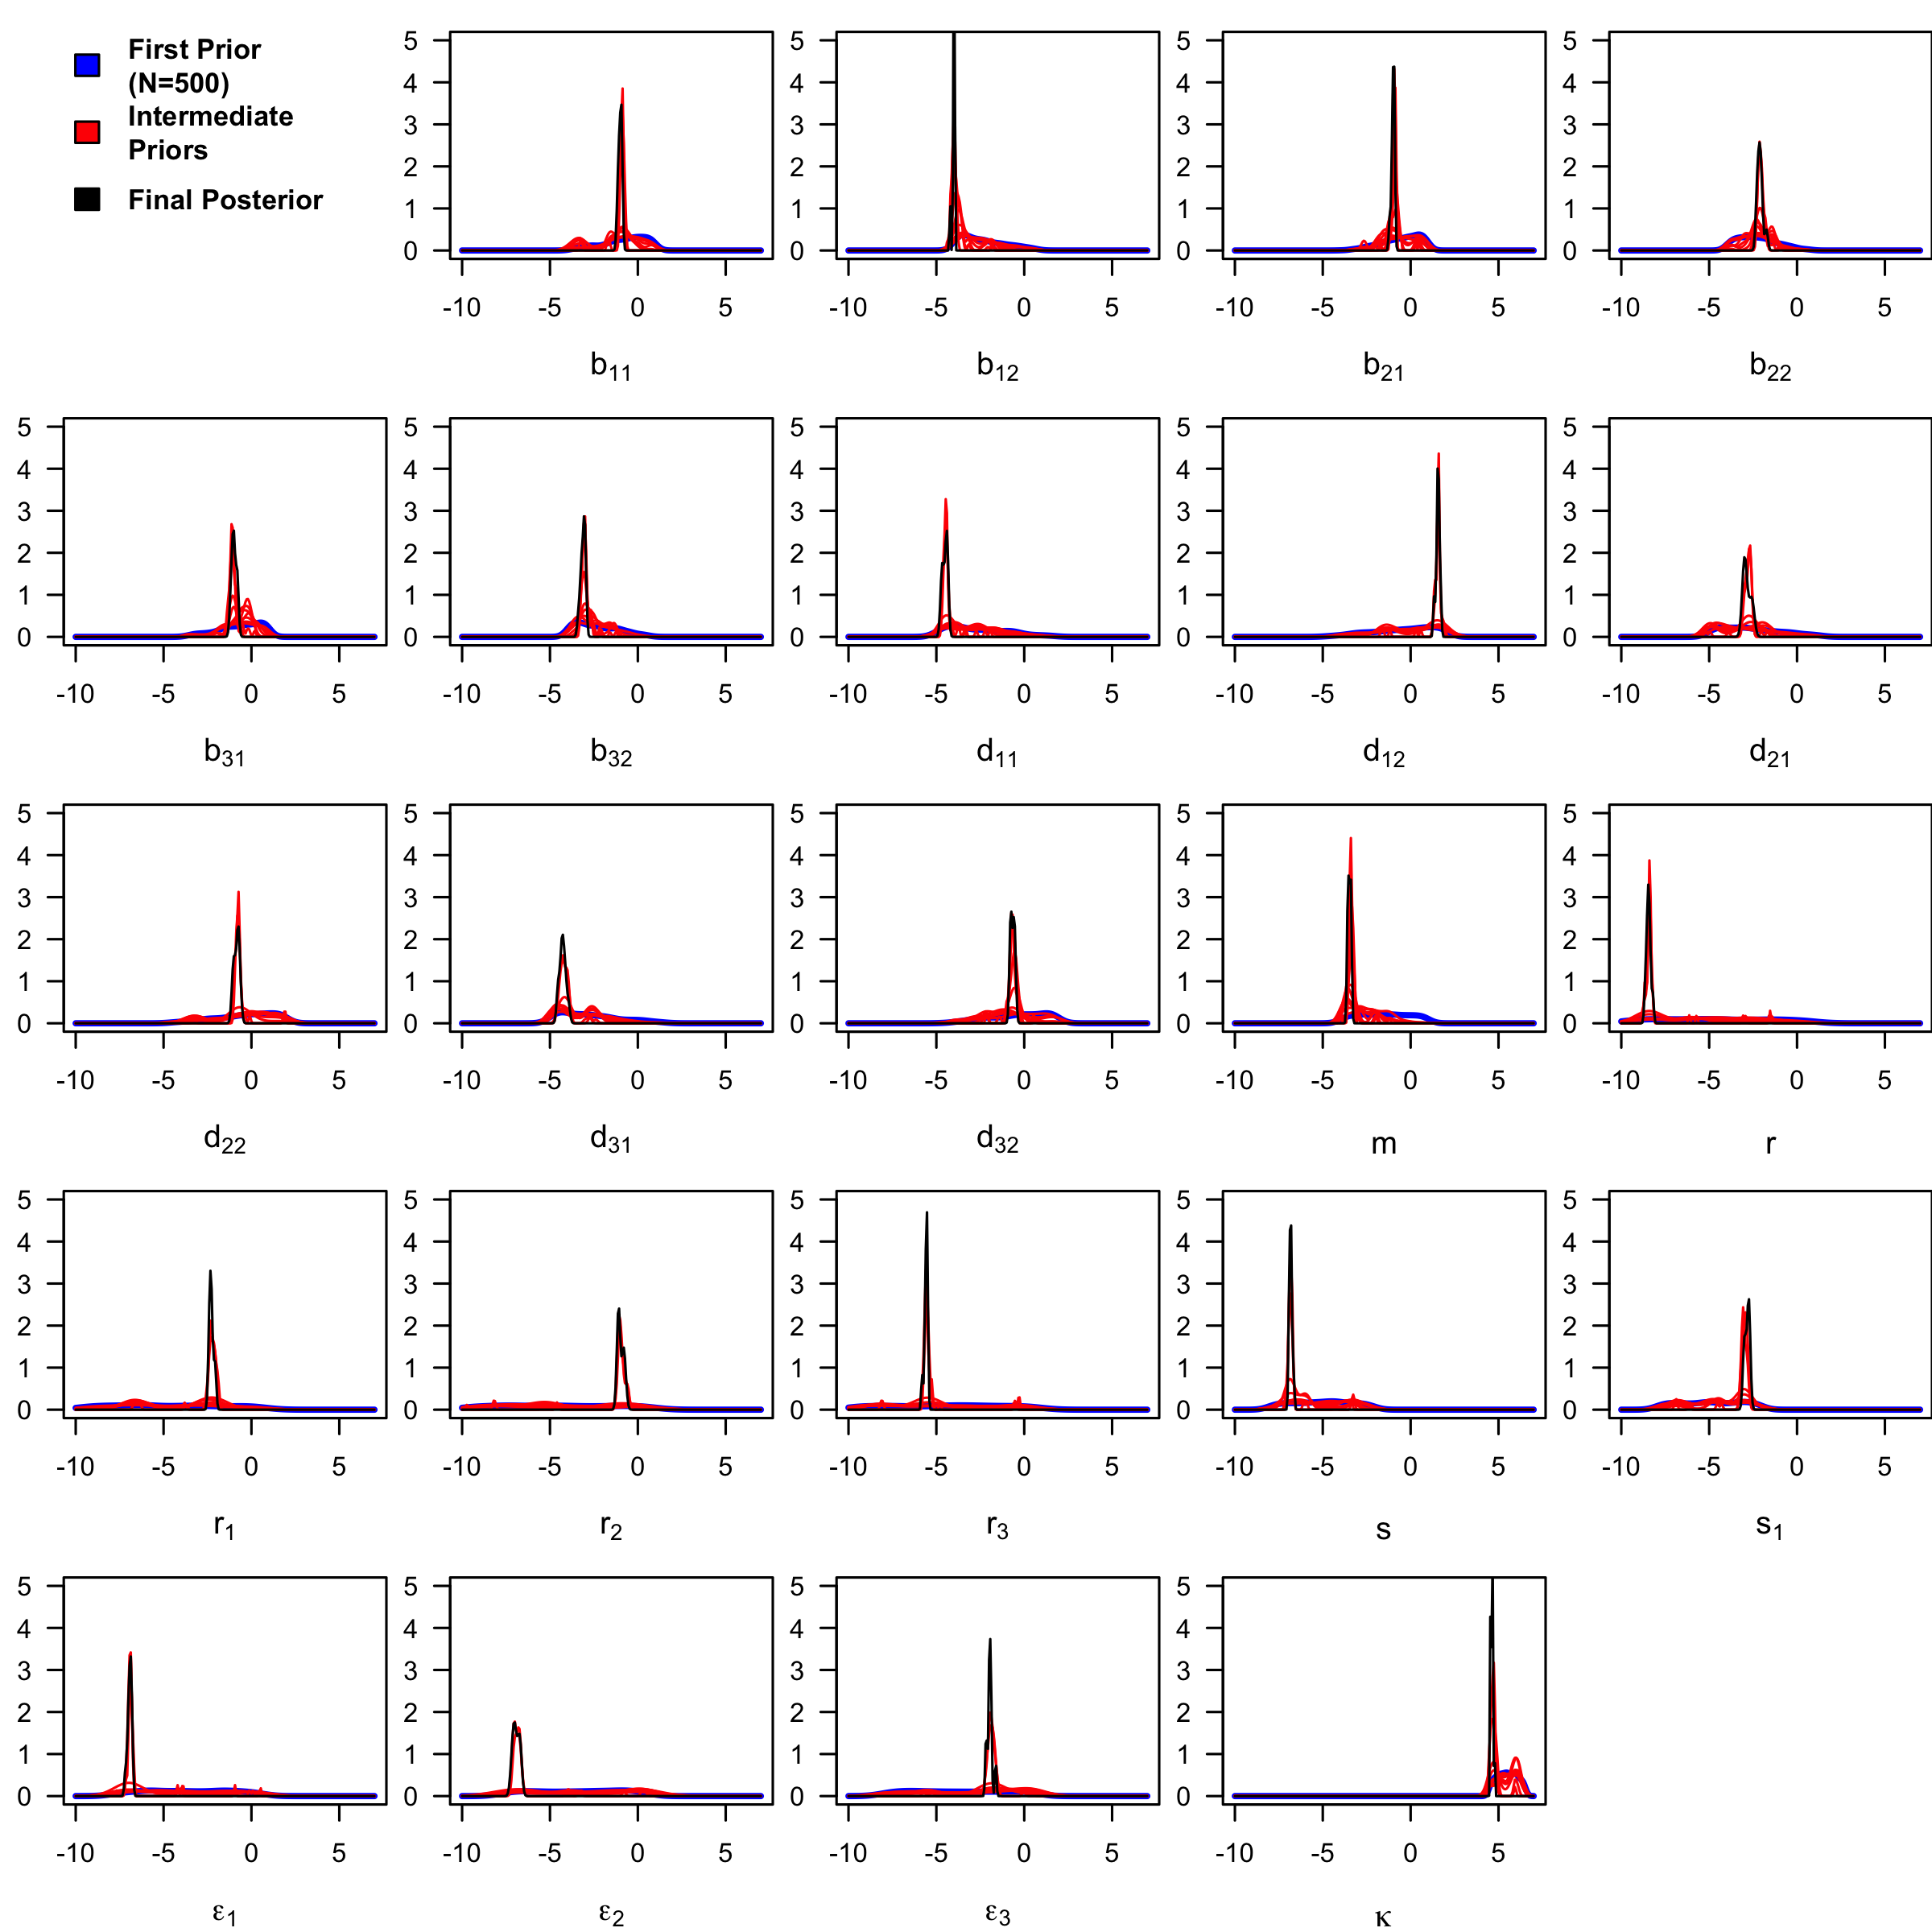

In [13]:
#All model parameters
n<-500
#par(mfrow=c(5,5), mar=c(4,0,1,0),font=2)
par(mfrow=c(5,5), mar=c(4,2,1,0),font=2)
plot(NULL ,xaxt='n',yaxt='n',bty='n', xlab="", ylab="",xlim=0:1, ylim=0:1)
plot_colors <- c("blue","red","black")
legend(x=-0.1,y=1.2,c(paste0("First Prior 
(N=",n,")"),"Intermediate 
Priors" ,"Final Posterior"),
        col=c("blue","red","black"),bty="n",cex=1.05,box.lwd = .8,fill=c("blue","red","black"),horiz=F)


for (k in 1:23) {
  plot(x, density_post[[n]][[1]][k, ], type="l", ylim=c(0,5),
       xlab=parameter_labels[k],ylab="", col="blue",cex.lab=1.2,lwd=2.5,las=1) 
  
    
  for (j in 2:10) {
    lines(x,density_post[[n]][[j]][k, ], yaxt= "n",col="red",lwd=1,pch=4,ann=FALSE,yaxt="n")
  }
    
     lines(x, density_post[[n]][[11]][k, ], col="black", lwd=1,ann=FALSE,yaxt="n")
   
}

# Importing saved results on the regression-adjusted ABC posterior 

In [14]:
setwd("/Users/twunasi-admin/Desktop/Clement_Folder/Modified ABC-SMC fitting_results_current/Regression_adjustment_new")

In [18]:
Combined_posterior_adj_output<- read.csv("Post_Regression_output.csv")
Combined_posterior_adj_output<- Combined_posterior_adj_output[,-1]
rownames(Combined_posterior_adj_output)<-parameter_labels
Combined_posterior_adj_output

Posterior_estimate_adj Cred_Int_lower95_adj
paste("b"[11])    3.651270e-01           3.119936e-01        
paste("b"[12])    5.313427e-02           4.074003e-02        
paste("b"[21])    3.632767e-01           3.121010e-01        
paste("b"[22])    1.248821e-01           1.011357e-01        
paste("b"[31])    5.912598e-01           5.274774e-01        
paste("b"[32])    4.467780e-02           3.529470e-02        
paste("d"[11])    1.081110e-02           8.893770e-03        
paste("d"[12])    4.218745e+00           3.474935e+00        
paste("d"[21])    7.984001e-02           6.671476e-02        
paste("d"[22])    4.450390e-01           3.465651e-01        
paste("d"[31])    1.429041e-02           1.071985e-02        
paste("d"[32])    5.211849e-01           4.471090e-01        
paste("m")        2.309237e-02           2.105598e-02        
paste("r")        2.158640e-04           1.774566e-04        
paste("r"[1])     1.028970e-01           8.804697e-02        
paste("r"[2])     4.009032e-01           3.504955e-01        
paste("r"[3])     3.691061e-03           3.088494e-03        
paste("s")        1.126410e-03           1.039375e-03        
paste("s"[1])     5.905062e-02           4.806403e-02        
paste(epsilon[1]) 1.223991e-03           1.009427e-03        
paste(epsilon[2]) 9.616526e-04           7.685273e-04        
paste(epsilon[3]) 2.778369e-01           2.417448e-01        
paste(kappa)      1.045463e+02           9.343877e+01        
                  Cred_Int_upper95_adj Posterior_estimate_unadj
paste("b"[11])    4.070946e-01         3.664044e-01            
paste("b"[12])    5.544072e-02         1.811519e-02            
paste("b"[21])    3.983173e-01         3.682176e-01            
paste("b"[22])    1.661017e-01         1.235632e-01            
paste("b"[31])    7.080126e-01         3.777583e-01            
paste("b"[32])    5.020353e-02         4.439107e-02            
paste("d"[11])    1.272384e-02         1.102459e-02            
paste("d"[12])    4.816930e+00         4.729410e+00            
paste("d"[21])    1.133474e-01         5.942112e-02            
paste("d"[22])    5.260394e-01         4.346025e-01            
paste("d"[31])    1.862146e-02         1.409390e-02            
paste("d"[32])    6.031482e-01         5.179375e-01            
paste("m")        2.423107e-02         3.073260e-02            
paste("r")        2.598316e-04         2.155524e-04            
paste("r"[1])     1.279065e-01         1.034074e-01            
paste("r"[2])     5.210640e-01         3.823572e-01            
paste("r"[3])     4.115238e-03         3.744237e-03            
paste("s")        1.257291e-03         1.093328e-03            
paste("s"[1])     6.849388e-02         5.878720e-02            
paste(epsilon[1]) 1.404088e-03         9.848305e-04            
paste(epsilon[2]) 1.257715e-03         1.002344e-03            
paste(epsilon[3]) 3.569201e-01         1.426919e-01            
paste(kappa)      1.162911e+02         1.035974e+02            
                  Cred_Int_lower95_unadj Cred_Int_upper95_unadj
paste("b"[11])    3.133116e-01           4.092558e-01          
paste("b"[12])    1.526969e-02           1.913379e-02          
paste("b"[21])    3.123895e-01           3.987035e-01          
paste("b"[22])    1.010003e-01           1.658747e-01          
paste("b"[31])    3.097097e-01           4.515250e-01          
paste("b"[32])    3.531119e-02           5.022999e-02          
paste("d"[11])    8.906418e-03           1.274585e-02          
paste("d"[12])    3.852081e+00           5.480785e+00          
paste("d"[21])    4.649222e-02           8.182961e-02          
paste("d"[22])    3.474176e-01           5.246951e-01          
paste("d"[31])    1.071100e-02           1.860917e-02          
paste("d"[32])    4.467116e-01           6.026094e-01          
paste("m")        2.757985e-02           3.382959e-02          
paste("r")        1.793363e-04           2.632773e-04          
paste("r"[1])     8.804277e-02    

In [21]:
Posterior_adj_distn<- read.csv("Posterior_adjusted_distn_L2_500.csv")
Posterior_adj_distn<- Posterior_adj_distn[-1]
head(Posterior_adj_distn)

V1         V2        V3         V4        V5         V6        V7       
1 -0.9473040 -3.988615 -0.9275625 -2.262379 -0.8295441 -3.181874 -4.390967
2 -1.0921300 -3.973684 -1.0008208 -2.091661 -0.9720944 -3.002003 -4.734900
3 -1.0589662 -3.964000 -0.9172073 -2.301414 -0.8100736 -3.242482 -4.436848
4 -0.9562281 -4.222372 -0.9454460 -2.229132 -1.1270353 -2.987990 -4.357502
5 -1.0056750 -4.004134 -1.0580055 -2.111204 -1.0419104 -3.080725 -4.599856
6 -1.0921315 -3.987439 -1.0649975 -1.996036 -0.9901417 -3.099506 -4.673047
  V8       V9        V10        ⋯ V14       V15       V16        V17      
1 1.643685 -2.586144 -0.9402481 ⋯ -8.500091 -2.111513 -0.7925641 -5.532661
2 1.538631 -2.963646 -0.8187190 ⋯ -8.364486 -2.298728 -1.0587317 -5.579745
3 1.439411 -2.621338 -1.0579843 ⋯ -8.640243 -2.312063 -0.8281403 -5.489589
4 1.717960 -2.993759 -0.9579653 ⋯ -8.439583 -2.394501 -1.1113772 -5.640386
5 1.523837 -2.922062 -0.7629040 ⋯ -8.471640 -2.322966 -1.0692411 -5.537402
6 1.619461 -2.959491 -0.7609170 ⋯ -8.509598 -2.440219 -1.1119744 -5.508260
  V18       V19       V20       V21       V22       V23     
1 -6.798463 -2.749437 -6.890301 -6.777033 -1.898456 4.622659
2 -6.893226 -2.744147 -6.957771 -7.114093 -1.993202 4.699526
3 -6.797049 -2.951278 -6.859617 -6.692673 -1.877898 4.534910
4 -6.838292 -2.923894 -7.023467 -6.980106 -2.184342 4.773579
5 -6.909608 -2.716844 -6.795823 -7.053470 -2.002505 4.652517
6 -6.756686 -2.671301 -6.796098 -7.027830 -1.997996 4.634248

In [22]:
#Estimating the kernel density of the adjusted posterior

density_post_adjusted<- array(dim=c(number_of_parameters, 256))

for(k in 1:number_of_parameters){
density_post_adjusted[k, ]<- density(Posterior_adj_distn[ ,k], from=-10, to=7, n=256)$y
}

# Density plot of undajusted and adjusted posterior distribution at N=500

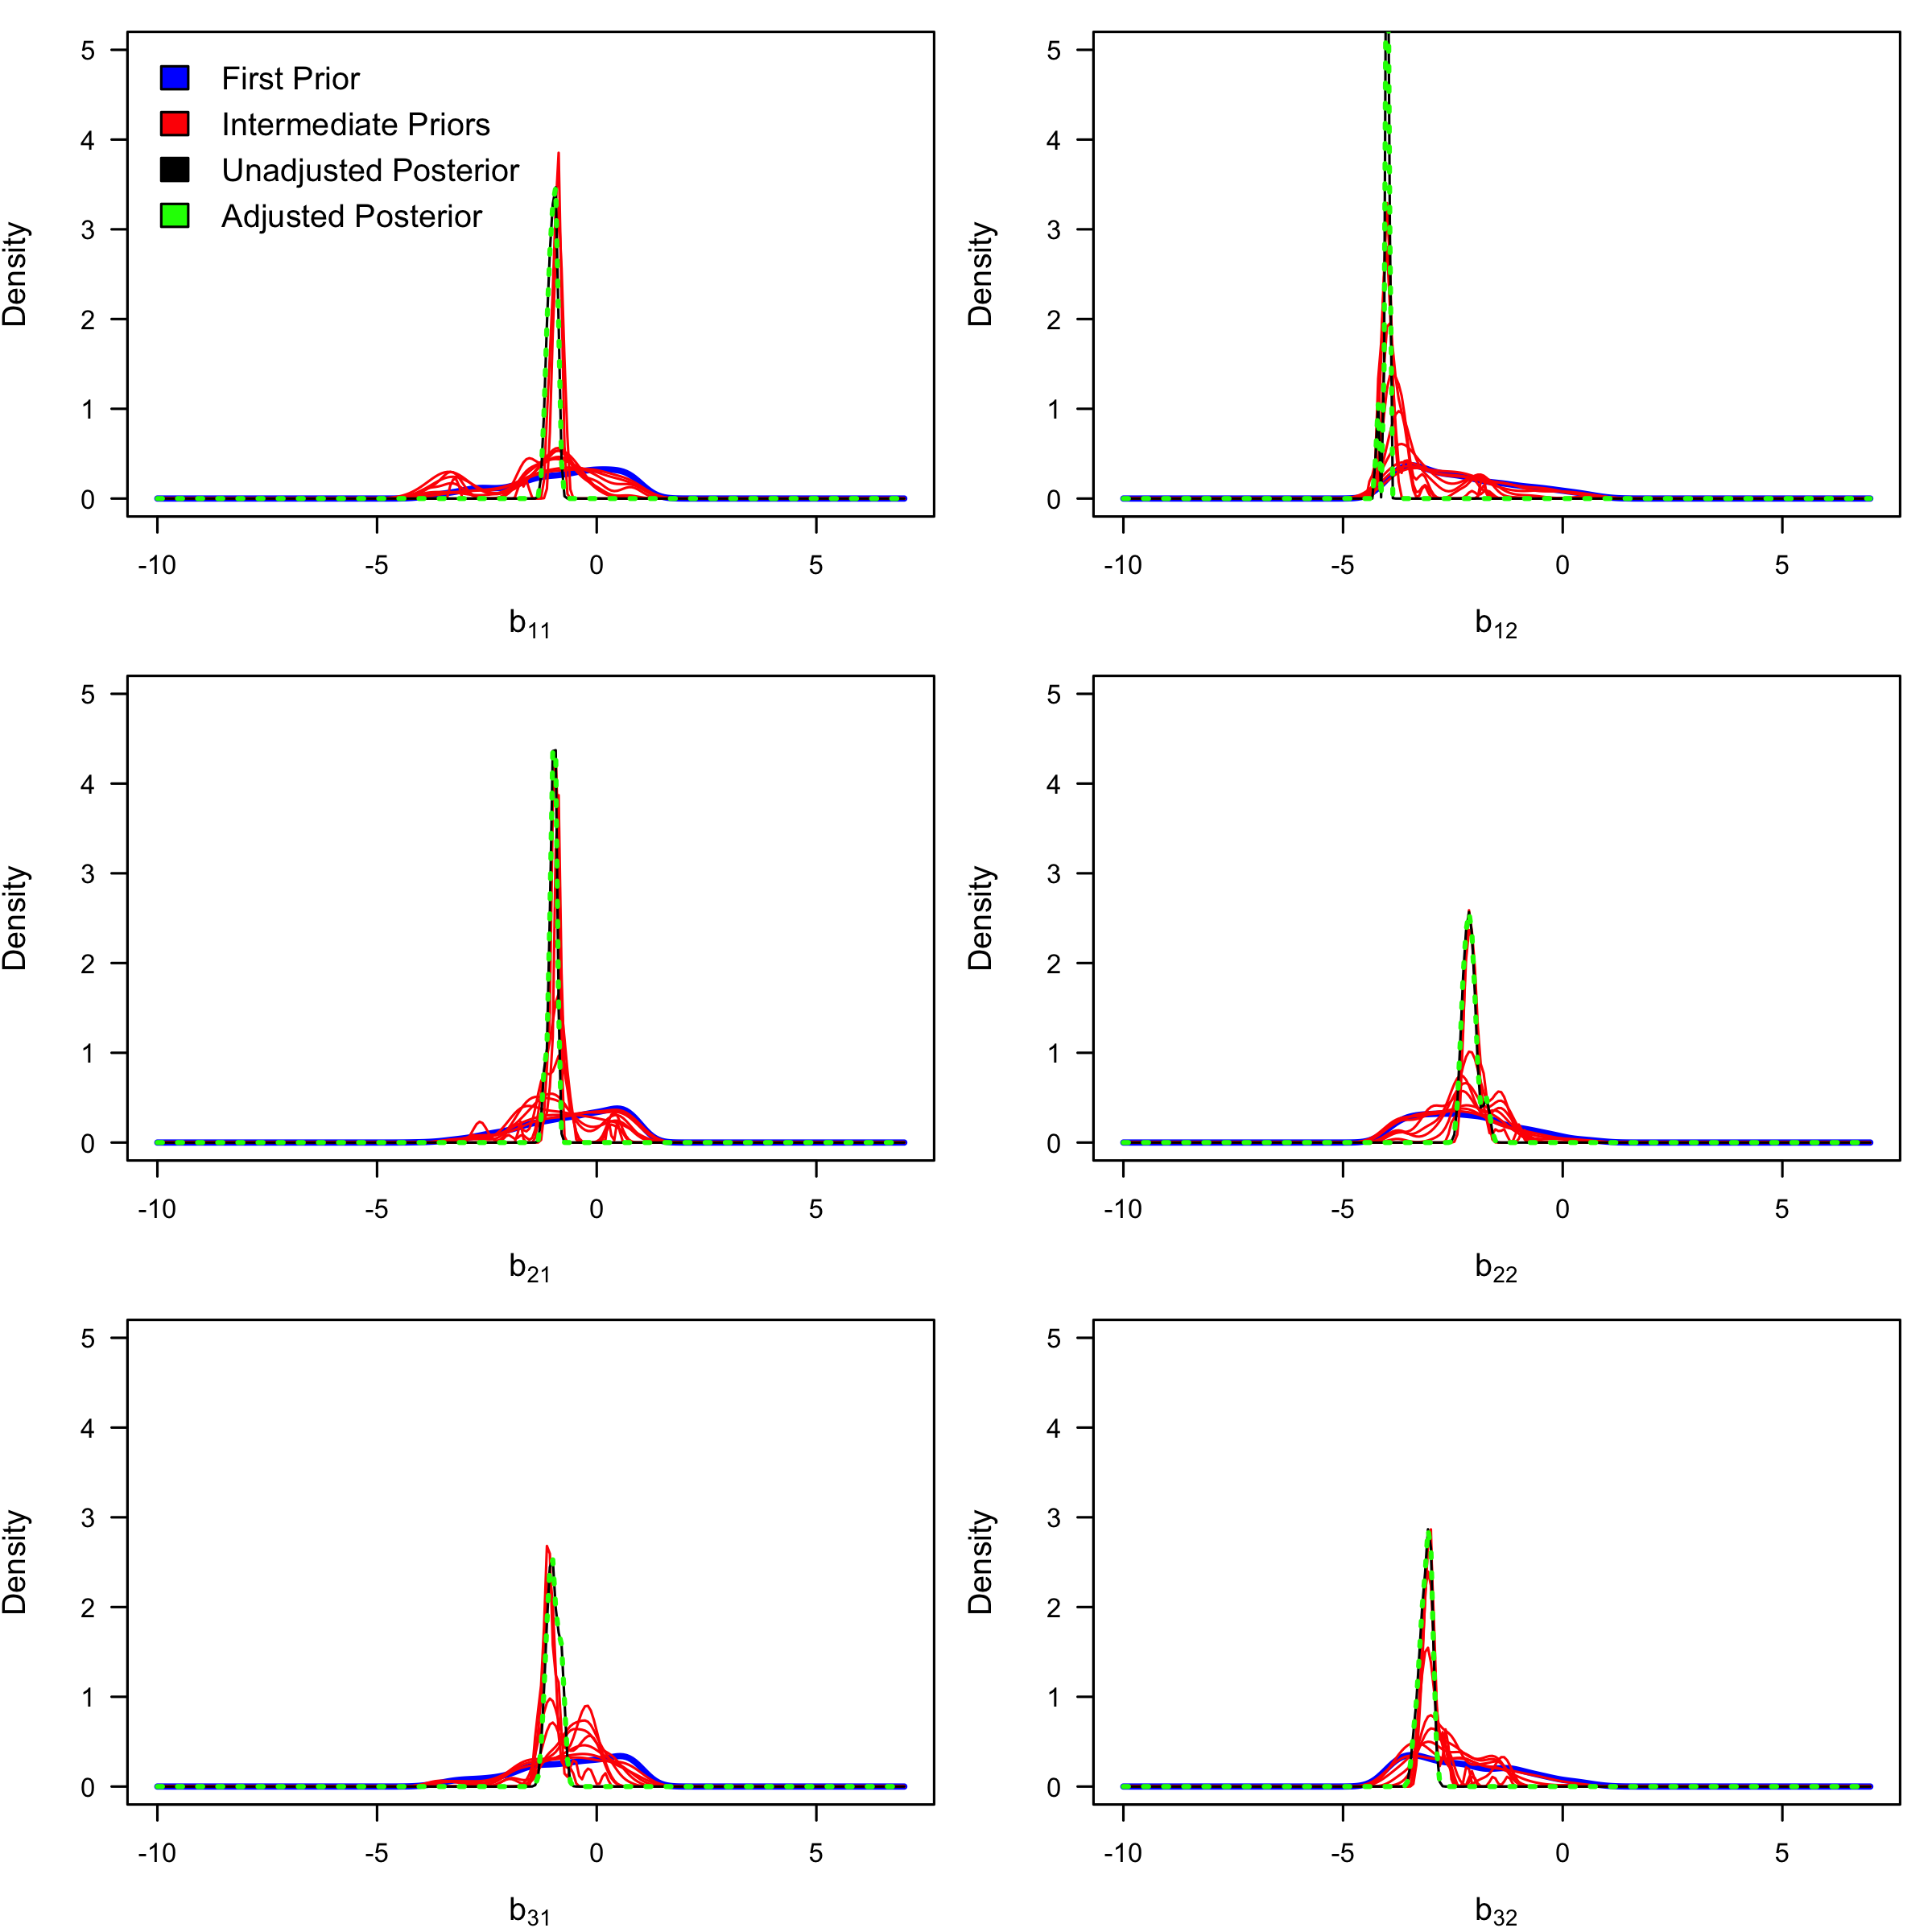

In [33]:
par(mfrow=c(3,2),mar=c(4,4,1,1))
n=500
x <- seq(from = -10, to = 7, length.out = 256)#range of prior distribution

for (k in 1:6) {
  plot(x, density_post[[n]][[1]][k, ], type="l", ylim=c(0,5),
       xlab=parameter_labels[k],ylab="Density", col="blue",cex.lab=1.2,lwd=2.5,las=1) 
  
    
  for (j in 2:10) {
    lines(x,density_post[[n]][[j]][k, ], yaxt= "n",col="red",lwd=1,pch=4,ann=FALSE,yaxt="n")
  }
    
     lines(x, density_post[[n]][[11]][k, ], col="black", lwd=1)
     lines(x,density_post_adjusted[k, ], col="green",lty=3,lwd=2)
      if(k==1){
    legend("topleft",c("First Prior","Intermediate Priors" ,"Unadjusted Posterior","Adjusted Posterior"),
         col=c("blue","red","black","green"),bty="n",cex=1.2,box.lwd = 2,fill=c("blue","red","black","green"))
          }
    }

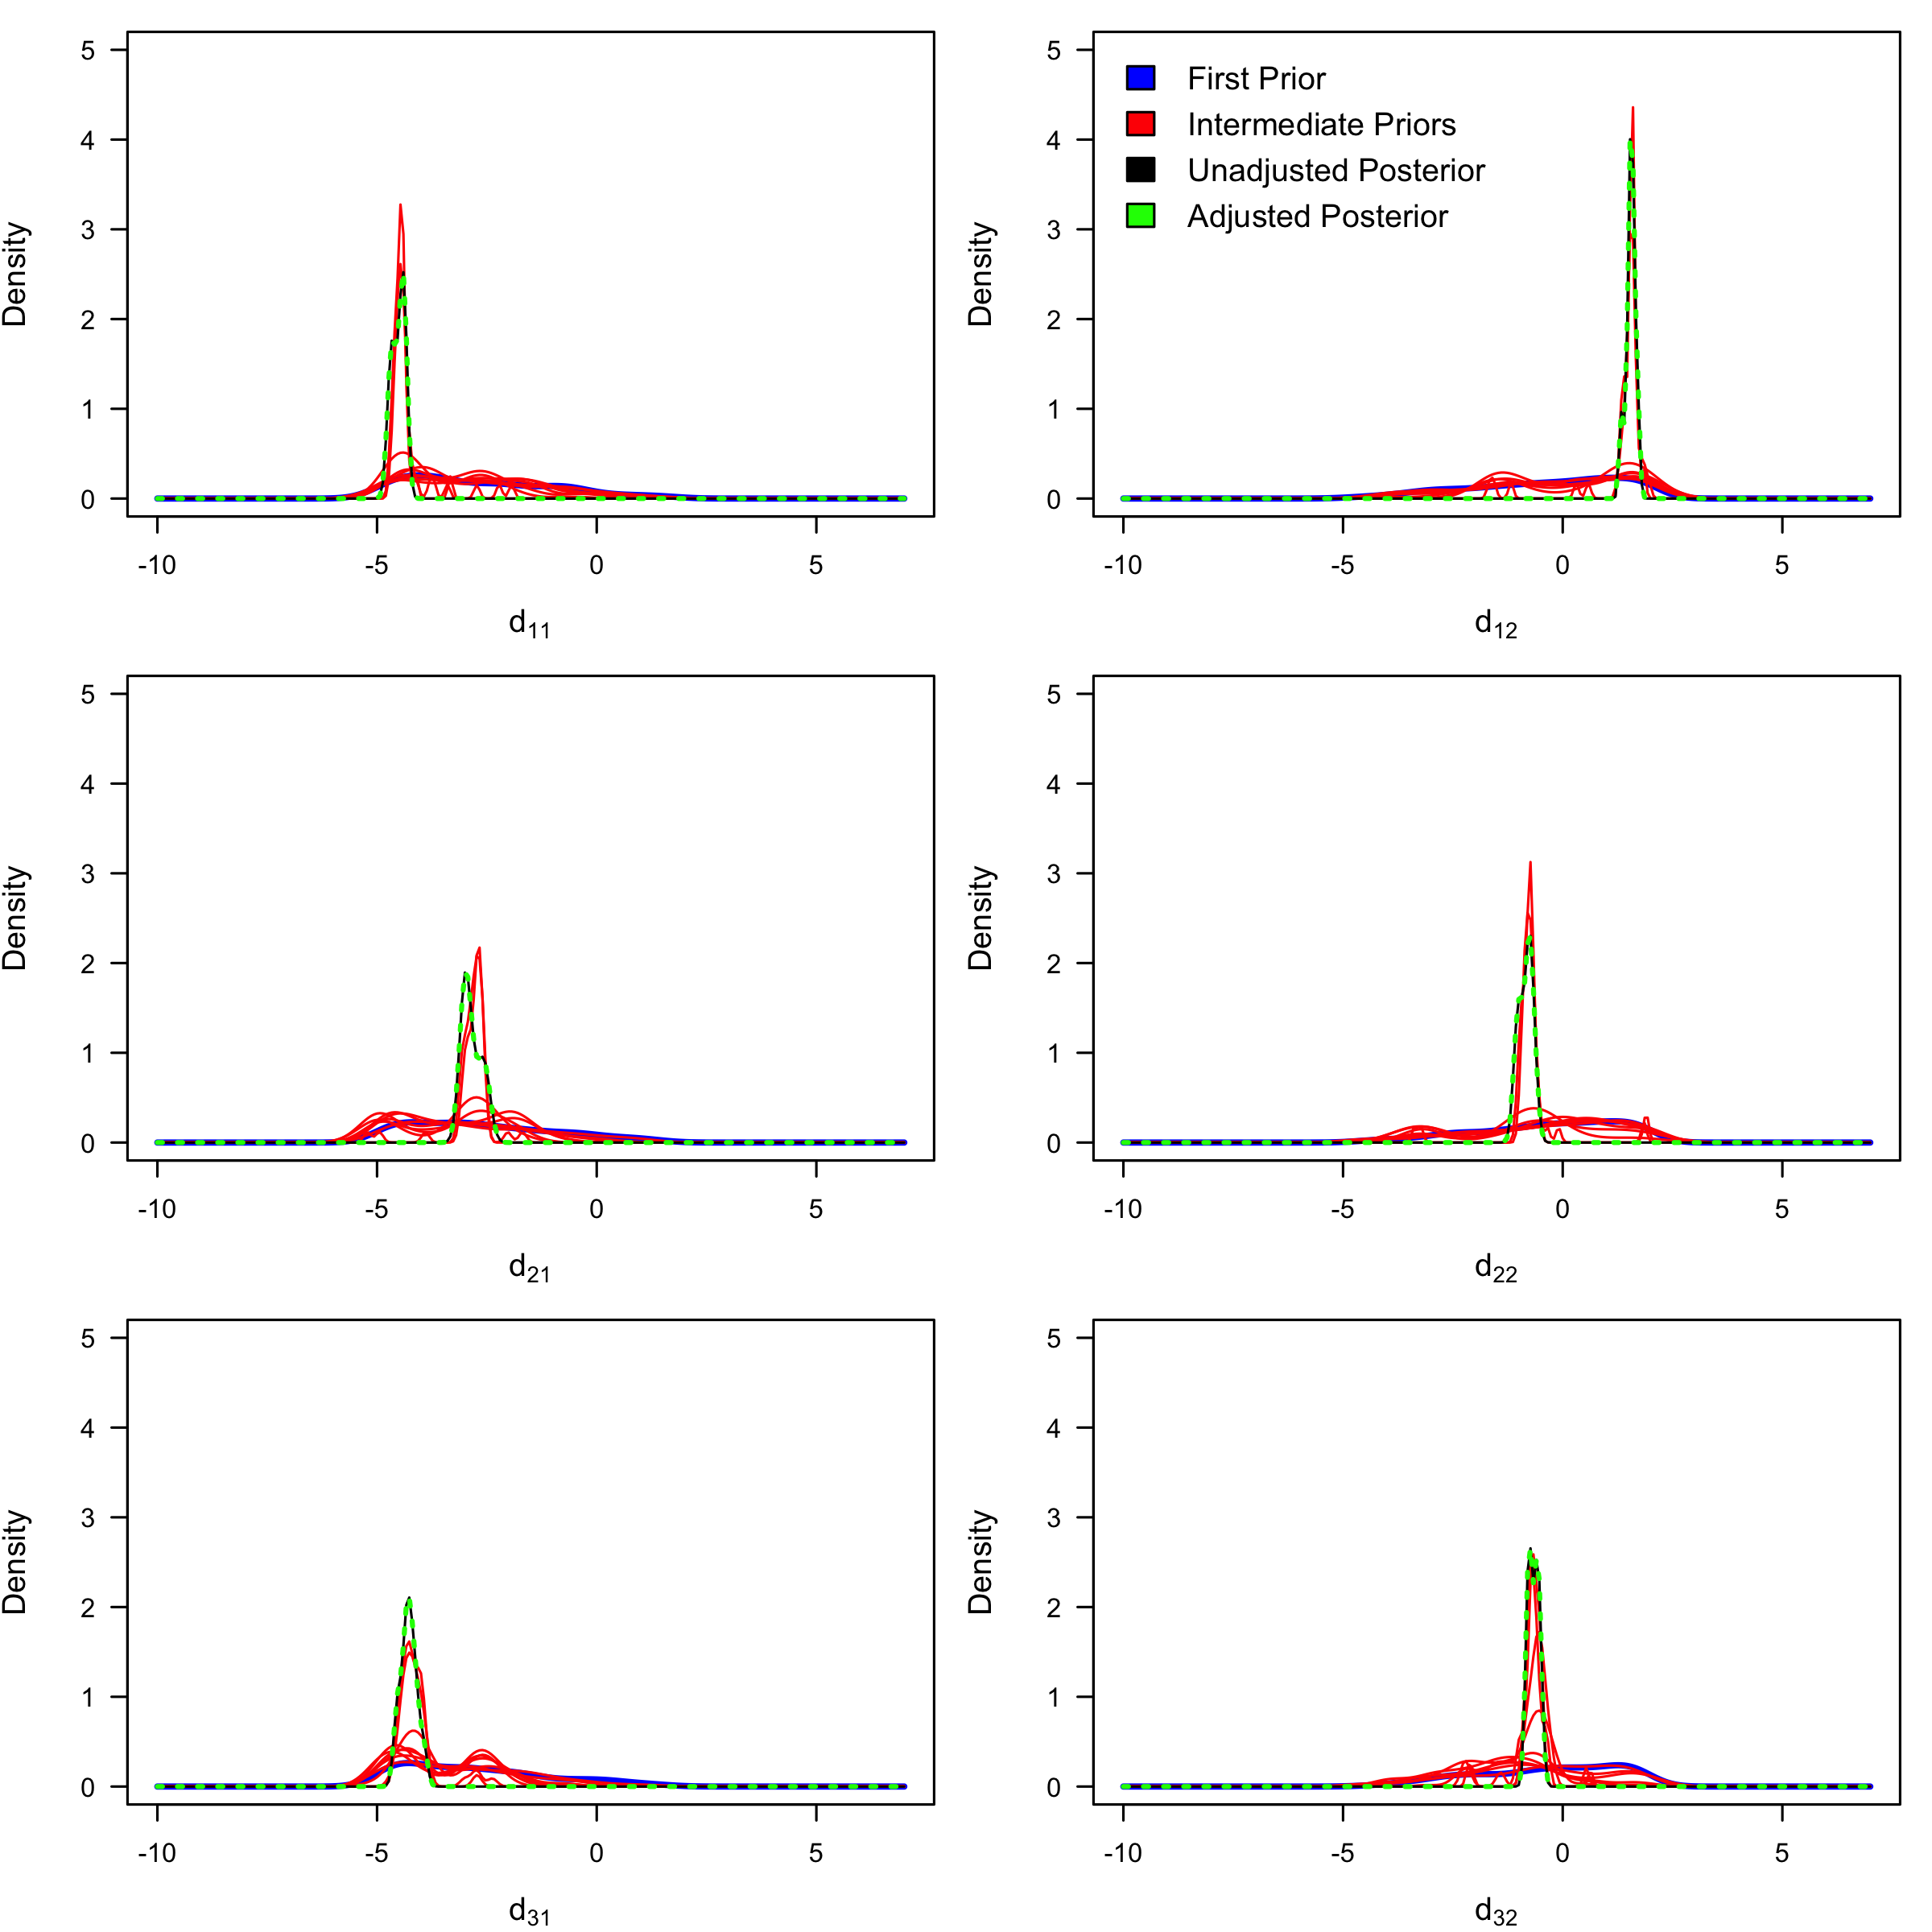

In [34]:
n=500
par(mfrow=c(3,2),mar=c(4,4,1,1))
for (k in 7:12) {
  plot(x, density_post[[n]][[1]][k, ], type="l", ylim=c(0,5),
       xlab=parameter_labels[k],ylab="Density", col="blue",cex.lab=1.2,lwd=2.5,las=1) 
  
    
  for (j in 2:10) {
    lines(x,density_post[[n]][[j]][k, ], yaxt= "n",col="red",lwd=1,pch=4,ann=FALSE,yaxt="n")
  }
    
     lines(x, density_post[[n]][[11]][k, ], col="black", lwd=1)
     lines(x,density_post_adjusted[k, ], col="green",lty=3,lwd=2)
    
       if(k==8){
    legend("topleft",c("First Prior","Intermediate Priors" ,"Unadjusted Posterior","Adjusted Posterior"),
         col=c("blue","red","black","green"),bty="n",cex=1.2,box.lwd = 2,fill=c("blue","red","black","green"))
           }
    }

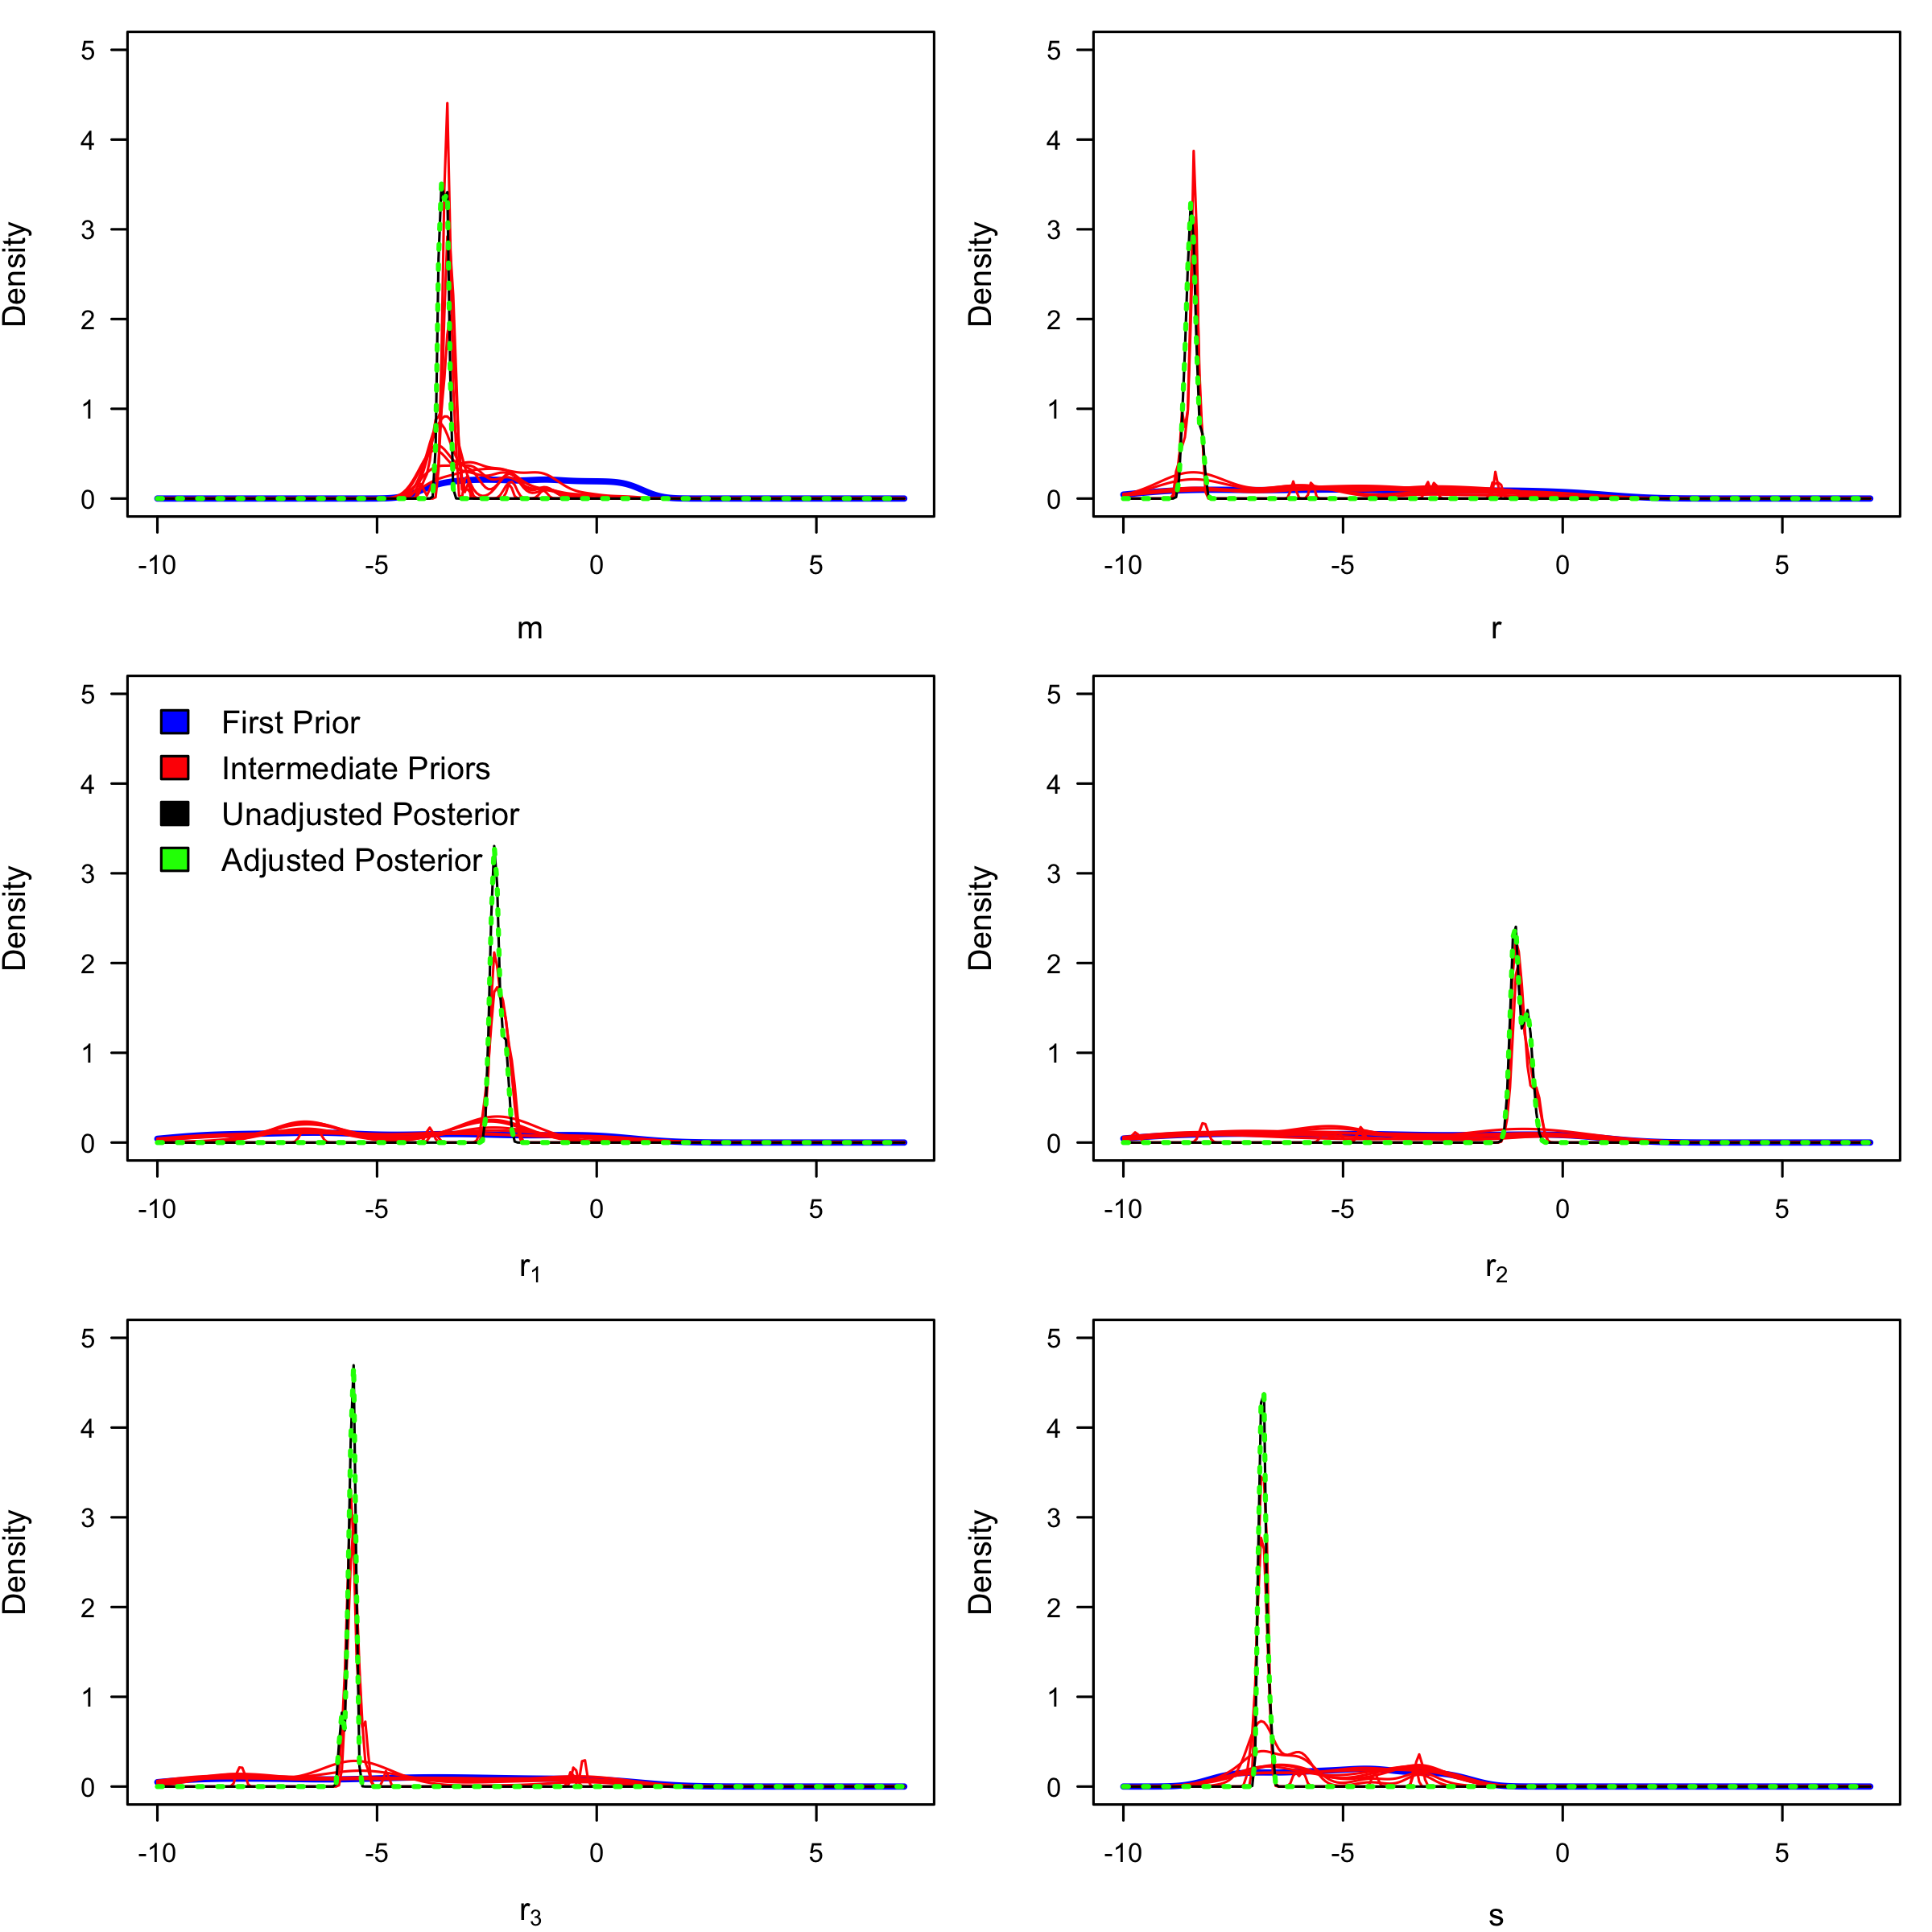

In [35]:
n=500
par(mfrow=c(3,2),mar=c(4,4,1,1))
for (k in 13:18) {
  plot(x, density_post[[n]][[1]][k, ], type="l", ylim=c(0,5),
       xlab=parameter_labels[k],ylab="Density", col="blue",cex.lab=1.2,lwd=2.5,las=1) 
  
    
  for (j in 2:10) {
    lines(x,density_post[[n]][[j]][k, ], yaxt= "n",col="red",lwd=1,pch=4,ann=FALSE,yaxt="n")
  }
    
     lines(x, density_post[[n]][[11]][k, ], col="black", lwd=1)
     lines(x,density_post_adjusted[k, ], col="green",lty=3,lwd=2)
    
      if(k==15){
    legend("topleft",c("First Prior","Intermediate Priors" ,"Unadjusted Posterior","Adjusted Posterior"),
         col=c("blue","red","black","green"),bty="n",cex=1.2,box.lwd = 2,fill=c("blue","red","black","green"))
          }
    }

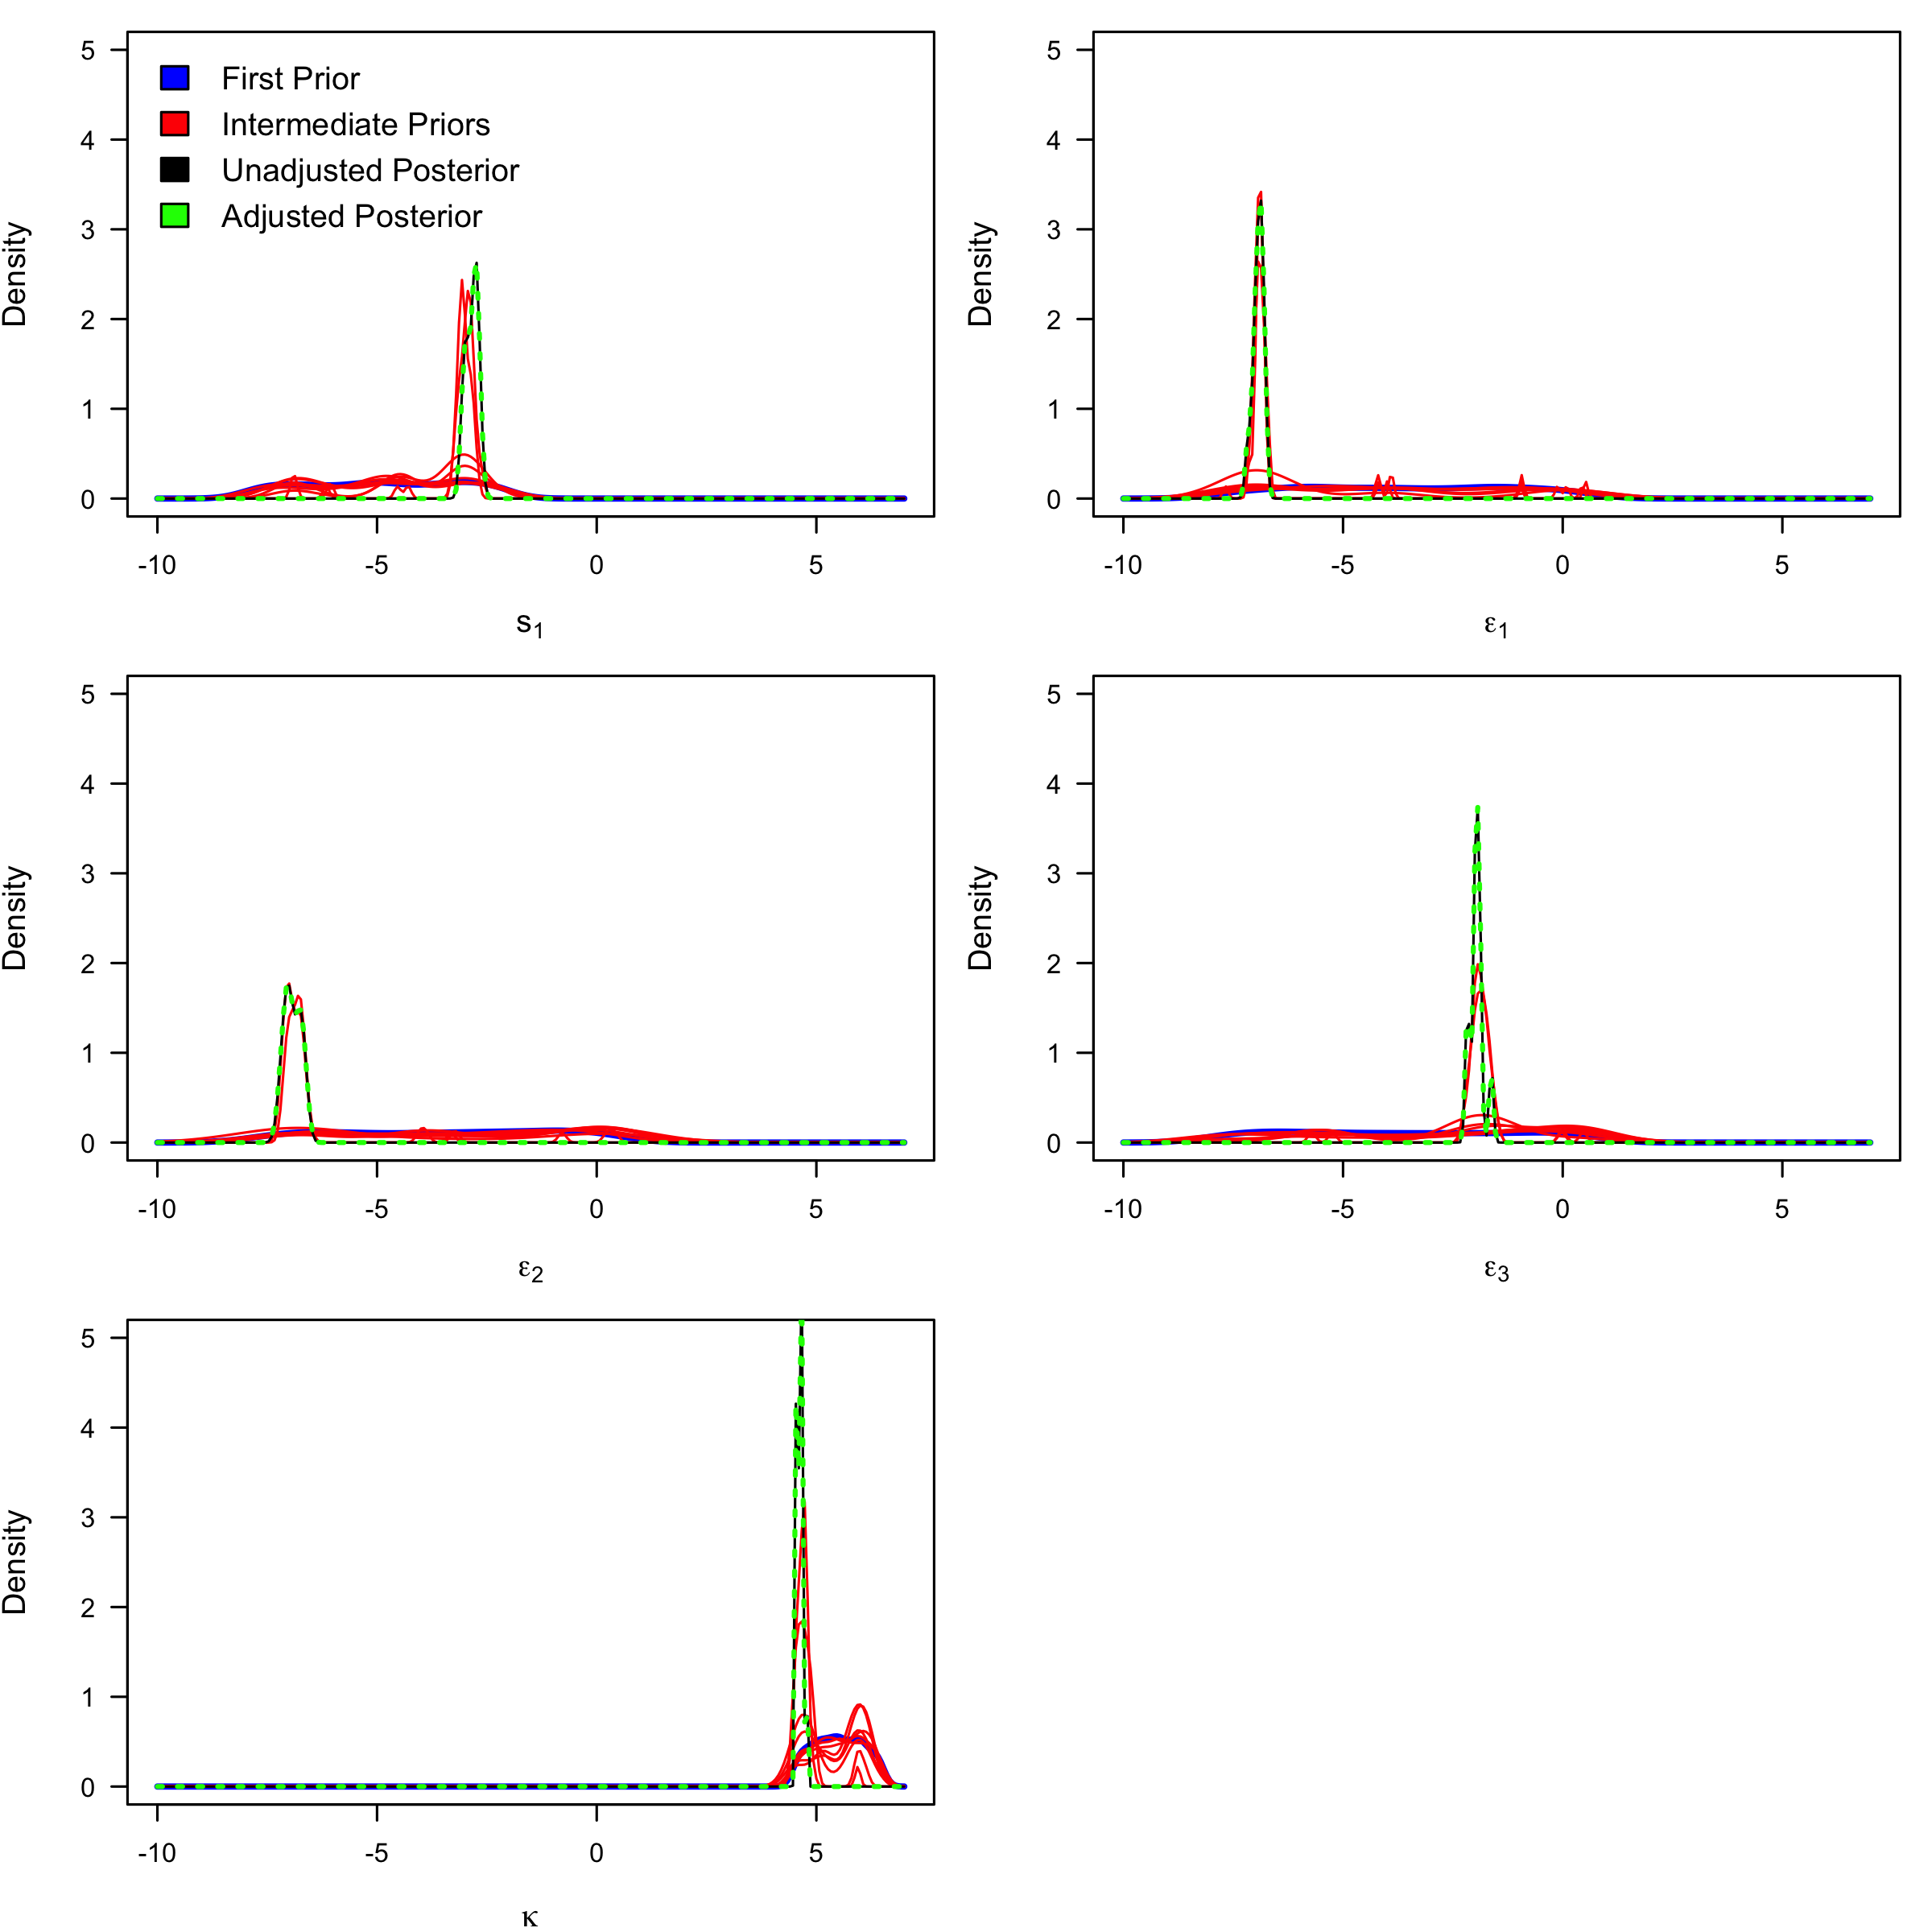

In [36]:
n=500
par(mfrow=c(3,2),mar=c(4,4,1,1))
for (k in 19:23) {
  plot(x, density_post[[n]][[1]][k, ], type="l", ylim=c(0,5),
       xlab=parameter_labels[k],ylab="Density", col="blue",cex.lab=1.2,lwd=2.5,las=1) 
  
    
  for (j in 2:10) {
    lines(x,density_post[[n]][[j]][k, ], yaxt= "n",col="red",lwd=1,pch=4,ann=FALSE,yaxt="n")
  }
    
     lines(x, density_post[[n]][[11]][k, ], col="black", lwd=1)
     lines(x,density_post_adjusted[k, ], col="green",lty=3,lwd=2)
    
       if(k==19){
    legend("topleft",c("First Prior","Intermediate Priors" ,"Unadjusted Posterior","Adjusted Posterior"),
         col=c("blue","red","black","green"),bty="n",cex=1.2,box.lwd = 2,fill=c("blue","red","black","green"))
           }
    }